### Unzip the downloaded data

```shell
gunzip /home/q5gong/CSE185FinalProject/Figure_1e/data/GSE132440_ATAC_PeakNorm.txt.gz
```

### Install packages

```R
install.packages("tidyverse")
install.packages("dplyr")

library("devtools")
install_github("jokergoo/ComplexHeatmap")
```

### Load the libraries

In [1]:
library("readxl")
library("dplyr")
library("circlize")
library("ComplexHeatmap")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: grid

ComplexHeatmap version 2.13.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensi

### ATAC Peak Normalized Data Processing
- data: `ATAC_PeakNorm.txt` 
- location: `/home/q5gong/CSE185FinalProject/Figure_1e/data/GSE132440_ATAC_PeakNorm.txt`
>- All ATAC peaks from all samples were merged by combining peaks within 500bp of each. featureCount was used to count the mapped reads for each sample. The resulting peak atlas was normalized using DESeq2.

In [2]:
data <- read.csv("data/GSE132440_ATAC_PeakNorm.txt", sep="\t",
                  row.name="Peaks")
head(data)
names(data)

,D13_2_T1.Normal..C.RIK.PBS.d2.,D7_3_T1.Normal..C.RIK.PBS.d2.,D1_2_C.Ren.PBS.D2..female.,D8_2_T2.Reg.ADM..C.RIK.Caer.d2.,D8_3_T2.Reg.ADM..C.RIK.Caer.d2.,D11_1_T2.Reg.ADM..C.RIK.Caer.d2.,D14_2_C.Ren.C.d2..ADM.shRen..,D6_1_C.Ren.C.d2..ADM.shRen..,D6_3_T3.KrasG12D..KC.RIK.PBS.d2.,D8_1_T3.KrasG12D..KC.RIK.PBS.d2.,⋯,D19_1_T4.Tum.ADR..KC.RIK.Caer.d2.,D19_3_T4.Tum.ADR..KC.RIK.Caer.d2.,D4_2_KC.REN.C.d2..ADR.shRen..,D11_3_KC.552OFF.C.d2...ADR.sh552Off.,D2_1_T7.PDAC..KPflC.GEMMs.,D12_1_T7.PDAC..KPcr_organoids.,D12_2_T7.PDAC..KPcr_organoids.,D22_3_T7.PDAC..KPcr_organoids.,D3_2_T7.PDAC..KPR127H_shp53_orgs.,D3_3_T7.PDAC..KPR127H_Ren_orgs.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_3001656_3001961,13.419960,5.367960,11.50487,2.645634,4.317972,6.110474,6.988018,4.69051,6.218671,9.213464,⋯,5.297277,2.788978,7.399043,2.088005,12.564510,4.917989,3.185094,13.584760,6.75689,13.294766
chr1_3109719_3110326,9.585685,19.324655,34.51461,14.550989,12.474142,13.748566,29.564693,10.05109,9.567187,8.555359,⋯,9.837801,7.669690,4.708482,4.698010,3.769353,6.762235,9.555281,81.508557,10.61797,5.908785
chr1_3192412_3193073,1.917137,8.588735,13.80585,8.598312,7.676395,6.110474,10.213258,12.06131,7.175390,7.239150,⋯,6.810785,4.880712,6.053762,6.264014,6.282255,6.762235,11.678677,9.056506,14.47905,38.407103
chr1_3239108_3239709,15.337097,6.441552,32.21364,14.550989,14.393240,11.711741,10.213258,18.09197,15.785858,13.162091,⋯,13.621570,16.733870,14.125445,9.396021,26.385471,11.065476,30.789239,31.697772,21.23594,29.543925
chr1_3351007_3351367,21.088508,7.515144,32.21364,8.598312,9.115719,7.638092,10.213258,10.05109,10.045546,7.897255,⋯,11.351308,11.155913,10.089604,8.874020,15.077412,6.147486,8.493583,18.113013,33.78445,14.771963
chr1_3439540_3440102,13.419960,22.545431,32.21364,15.873806,14.393240,9.674917,10.213258,20.10218,9.567187,14.478300,⋯,12.108062,14.642136,15.470725,8.352018,25.129020,15.983465,11.678677,18.113013,25.09702,31.021121


[1] "D13_2_T1.Normal..C.RIK.PBS.d2."      
 [2] "D7_3_T1.Normal..C.RIK.PBS.d2."       
 [3] "D1_2_C.Ren.PBS.D2..female."          
 [4] "D8_2_T2.Reg.ADM..C.RIK.Caer.d2."     
 [5] "D8_3_T2.Reg.ADM..C.RIK.Caer.d2."     
 [6] "D11_1_T2.Reg.ADM..C.RIK.Caer.d2."    
 [7] "D14_2_C.Ren.C.d2..ADM.shRen.."       
 [8] "D6_1_C.Ren.C.d2..ADM.shRen.."        
 [9] "D6_3_T3.KrasG12D..KC.RIK.PBS.d2."    
[10] "D8_1_T3.KrasG12D..KC.RIK.PBS.d2."    
[11] "D13_3_T3.KrasG12D..KC.RIK.PBS.d2."   
[12] "D7_1_T4.Tum.ADR..KC.RIK.Caer.d2."    
[13] "D18_3_T4.Tum.ADR..KC.RIK.Caer.d2."   
[14] "D19_1_T4.Tum.ADR..KC.RIK.Caer.d2."   
[15] "D19_3_T4.Tum.ADR..KC.RIK.Caer.d2."   
[16] "D4_2_KC.REN.C.d2..ADR.shRen.."       
[17] "D11_3_KC.552OFF.C.d2...ADR.sh552Off."
[18] "D2_1_T7.PDAC..KPflC.GEMMs."          
[19] "D12_1_T7.PDAC..KPcr_organoids."      
[20] "D12_2_T7.PDAC..KPcr_organoids."      
[21] "D22_3_T7.PDAC..KPcr_organoids."      
[22] "D3_2_T7.PDAC..KPR127H_shp53_orgs."   
[23] "D3_3_T7.PDAC..KPR127H_Ren_orgs."

In [3]:
# mannual column name replacement base on information of each samples 
# listed on https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE132440

names(data)[names(data) == "D1_2_C.Ren.PBS.D2..female."] <- "Normal_ATAC1"
names(data)[names(data) == "D13_2_T1.Normal..C.RIK.PBS.d2."] <- "Normal_ATAC2"
names(data)[names(data) == "D7_3_T1.Normal..C.RIK.PBS.d2."] <- "Normal_ATAC3" 
names(data)[names(data) == "D11_1_T2.Reg.ADM..C.RIK.Caer.d2."] <- "Injury_ATAC1"  
names(data)[names(data) == "D14_2_C.Ren.C.d2..ADM.shRen.."] <- "Injury_ATAC2"  
names(data)[names(data) == "D6_1_C.Ren.C.d2..ADM.shRen.."] <- "Injury_ATAC3"  
names(data)[names(data) == "D8_2_T2.Reg.ADM..C.RIK.Caer.d2."] <- "Injury_ATAC4"  
names(data)[names(data) == "D8_3_T2.Reg.ADM..C.RIK.Caer.d2."] <- "Injury_ATAC5"  
names(data)[names(data) == "D13_3_T3.KrasG12D..KC.RIK.PBS.d2."] <- "Kras_ATAC1"  
names(data)[names(data) == "D6_3_T3.KrasG12D..KC.RIK.PBS.d2."] <- "Kras_ATAC2"  
names(data)[names(data) == "D8_1_T3.KrasG12D..KC.RIK.PBS.d2."] <- "Kras_ATAC3" 
names(data)[names(data) == "D11_3_KC.552OFF.C.d2...ADR.sh552Off."] <- "KrasInjury_ATAC1"  
names(data)[names(data) == "D18_3_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC2"  
names(data)[names(data) == "D19_3_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC3"  
names(data)[names(data) == "D4_2_KC.REN.C.d2..ADR.shRen.."] <- "KrasInjury_ATAC4"  
names(data)[names(data) == "D7_1_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC5"  
names(data)[names(data) == "D19_1_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC6"  
names(data)[names(data) == "D2_1_T7.PDAC..KPflC.GEMMs."] <- "PDAC_ATAC1"  
names(data)[names(data) == "D12_1_T7.PDAC..KPcr_organoids."] <- "PDAC_ATAC2"  
names(data)[names(data) == "D12_2_T7.PDAC..KPcr_organoids."] <- "PDAC_ATAC3" 
names(data)[names(data) == "D22_3_T7.PDAC..KPcr_organoids."] <- "PDAC_ATAC4"

head(data)
names(data)

,Normal_ATAC2,Normal_ATAC3,Normal_ATAC1,Injury_ATAC4,Injury_ATAC5,Injury_ATAC1,Injury_ATAC2,Injury_ATAC3,Kras_ATAC2,Kras_ATAC3,⋯,KrasInjury_ATAC6,KrasInjury_ATAC3,KrasInjury_ATAC4,KrasInjury_ATAC1,PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,PDAC_ATAC4,D3_2_T7.PDAC..KPR127H_shp53_orgs.,D3_3_T7.PDAC..KPR127H_Ren_orgs.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_3001656_3001961,13.419960,5.367960,11.50487,2.645634,4.317972,6.110474,6.988018,4.69051,6.218671,9.213464,⋯,5.297277,2.788978,7.399043,2.088005,12.564510,4.917989,3.185094,13.584760,6.75689,13.294766
chr1_3109719_3110326,9.585685,19.324655,34.51461,14.550989,12.474142,13.748566,29.564693,10.05109,9.567187,8.555359,⋯,9.837801,7.669690,4.708482,4.698010,3.769353,6.762235,9.555281,81.508557,10.61797,5.908785
chr1_3192412_3193073,1.917137,8.588735,13.80585,8.598312,7.676395,6.110474,10.213258,12.06131,7.175390,7.239150,⋯,6.810785,4.880712,6.053762,6.264014,6.282255,6.762235,11.678677,9.056506,14.47905,38.407103
chr1_3239108_3239709,15.337097,6.441552,32.21364,14.550989,14.393240,11.711741,10.213258,18.09197,15.785858,13.162091,⋯,13.621570,16.733870,14.125445,9.396021,26.385471,11.065476,30.789239,31.697772,21.23594,29.543925
chr1_3351007_3351367,21.088508,7.515144,32.21364,8.598312,9.115719,7.638092,10.213258,10.05109,10.045546,7.897255,⋯,11.351308,11.155913,10.089604,8.874020,15.077412,6.147486,8.493583,18.113013,33.78445,14.771963
chr1_3439540_3440102,13.419960,22.545431,32.21364,15.873806,14.393240,9.674917,10.213258,20.10218,9.567187,14.478300,⋯,12.108062,14.642136,15.470725,8.352018,25.129020,15.983465,11.678677,18.113013,25.09702,31.021121


[1] "Normal_ATAC2"                      "Normal_ATAC3"                     
 [3] "Normal_ATAC1"                      "Injury_ATAC4"                     
 [5] "Injury_ATAC5"                      "Injury_ATAC1"                     
 [7] "Injury_ATAC2"                      "Injury_ATAC3"                     
 [9] "Kras_ATAC2"                        "Kras_ATAC3"                       
[11] "Kras_ATAC1"                        "KrasInjury_ATAC5"                 
[13] "KrasInjury_ATAC2"                  "KrasInjury_ATAC6"                 
[15] "KrasInjury_ATAC3"                  "KrasInjury_ATAC4"                 
[17] "KrasInjury_ATAC1"                  "PDAC_ATAC1"                       
[19] "PDAC_ATAC2"                        "PDAC_ATAC3"                       
[21] "PDAC_ATAC4"                        "D3_2_T7.PDAC..KPR127H_shp53_orgs."
[23] "D3_3_T7.PDAC..KPR127H_Ren_orgs."

In [4]:
# two PDAC data not found on the website, 
# rename to PDAC_ATAC5 and PDAC_ATAC6 for now
names(data)[names(data) == "D3_2_T7.PDAC..KPR127H_shp53_orgs."] <- "PDAC_ATAC5"
names(data)[names(data) == "D3_3_T7.PDAC..KPR127H_Ren_orgs."] <- "PDAC_ATAC6"

head(data)
names(data)

,Normal_ATAC2,Normal_ATAC3,Normal_ATAC1,Injury_ATAC4,Injury_ATAC5,Injury_ATAC1,Injury_ATAC2,Injury_ATAC3,Kras_ATAC2,Kras_ATAC3,⋯,KrasInjury_ATAC6,KrasInjury_ATAC3,KrasInjury_ATAC4,KrasInjury_ATAC1,PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,PDAC_ATAC4,PDAC_ATAC5,PDAC_ATAC6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_3001656_3001961,13.419960,5.367960,11.50487,2.645634,4.317972,6.110474,6.988018,4.69051,6.218671,9.213464,⋯,5.297277,2.788978,7.399043,2.088005,12.564510,4.917989,3.185094,13.584760,6.75689,13.294766
chr1_3109719_3110326,9.585685,19.324655,34.51461,14.550989,12.474142,13.748566,29.564693,10.05109,9.567187,8.555359,⋯,9.837801,7.669690,4.708482,4.698010,3.769353,6.762235,9.555281,81.508557,10.61797,5.908785
chr1_3192412_3193073,1.917137,8.588735,13.80585,8.598312,7.676395,6.110474,10.213258,12.06131,7.175390,7.239150,⋯,6.810785,4.880712,6.053762,6.264014,6.282255,6.762235,11.678677,9.056506,14.47905,38.407103
chr1_3239108_3239709,15.337097,6.441552,32.21364,14.550989,14.393240,11.711741,10.213258,18.09197,15.785858,13.162091,⋯,13.621570,16.733870,14.125445,9.396021,26.385471,11.065476,30.789239,31.697772,21.23594,29.543925
chr1_3351007_3351367,21.088508,7.515144,32.21364,8.598312,9.115719,7.638092,10.213258,10.05109,10.045546,7.897255,⋯,11.351308,11.155913,10.089604,8.874020,15.077412,6.147486,8.493583,18.113013,33.78445,14.771963
chr1_3439540_3440102,13.419960,22.545431,32.21364,15.873806,14.393240,9.674917,10.213258,20.10218,9.567187,14.478300,⋯,12.108062,14.642136,15.470725,8.352018,25.129020,15.983465,11.678677,18.113013,25.09702,31.021121


[1] "Normal_ATAC2"     "Normal_ATAC3"     "Normal_ATAC1"     "Injury_ATAC4"    
 [5] "Injury_ATAC5"     "Injury_ATAC1"     "Injury_ATAC2"     "Injury_ATAC3"    
 [9] "Kras_ATAC2"       "Kras_ATAC3"       "Kras_ATAC1"       "KrasInjury_ATAC5"
[13] "KrasInjury_ATAC2" "KrasInjury_ATAC6" "KrasInjury_ATAC3" "KrasInjury_ATAC4"
[17] "KrasInjury_ATAC1" "PDAC_ATAC1"       "PDAC_ATAC2"       "PDAC_ATAC3"      
[21] "PDAC_ATAC4"       "PDAC_ATAC5"       "PDAC_ATAC6"

### ATAC Peak Normalized Data Processing
- data: `ATAC_PeakNorm.txt` with accession # `GSE132440`
>- All ATAC peaks from all samples were merged by combining peaks within 500bp of each. featureCount was used to count the mapped reads for each sample. The resulting peak atlas was normalized using DESeq2.

cannot figuring out how to utilize the normalized peak data hence use the complementary data found from the paper, which consists of four excel sheet:
1. ATAC-seq-Clusters_Kmeans_peaks 
2. Injury_vs_Normal
3. KrasG12D_vs_Normal
4. KrasG12DInjury_vs_Normal
5. PDAC_vs_Normal

which sheet 2-4 is the output of DESeq result, could be used as selection for peak id and filter for peaks in `ATAC_PeakNorm.txt`

from the method:
"Dynamic ATAC peaks were called if they had an absolute log2-transformed fold change ≥ 0.58 and a FDR ≤ 0.1"

In [5]:
res1 <- data.frame(read_excel("data/41586_2020_3147_MOESM4_ESM.xlsx",
                              sheet="Injury_vs_Normal"))
row.names(res1) <- res1$region

In [6]:
res2 <- data.frame(read_excel("data/41586_2020_3147_MOESM4_ESM.xlsx",
                              sheet="KrasG12D_vs_Normal"))
row.names(res2) <- res2$region

In [7]:
res3 <- data.frame(read_excel("data/41586_2020_3147_MOESM4_ESM.xlsx",
                              sheet="KrasG12DInjury_vs_Normal"))
row.names(res3) <- res3$region

In [8]:
res4 <- data.frame(read_excel("data/41586_2020_3147_MOESM4_ESM.xlsx",
                              sheet="PDAC_vs_Normal"))
row.names(res4) <- res4$region

In [9]:
# find the significant peaks
sigPeaks <- unique(c(
    rownames(subset(res1, padj <= 0.1 & abs(log2FoldChange) >= 0.58)),
    rownames(subset(res2, padj <= 0.1 & abs(log2FoldChange) >= 0.58)),
    rownames(subset(res3, padj <= 0.1 & abs(log2FoldChange) >= 0.58)),
    rownames(subset(res4, padj <= 0.1 & abs(log2FoldChange) >= 0.58))
))
length(sigPeaks)

[1] 42892

In [10]:
dynamicPeaks <- data[sigPeaks,]

In [25]:
# z-score
scaled_dPeaks = t(scale(t(dynamicPeaks)))
# scaled_dPeaks <- subset(scaled_dPeaks,
#                         select=-c(PDAC_ATAC5, PDAC_ATAC6))

__From Extended Data Fig2__ \
- R cluster - Injury ATAC gain \
- S cluster - shared ATAC gain in all condition \
- N1 cluster - Kras ATAC gain \
- N2 cluster - Kras + Injury ATAC gain \
- A1 cluster - Kras ATAC loss \
- A2 cluster - shared ATAC loss \

>- and the cluster is creaded without clustering the PDAC data

In [26]:
set.seed(13)
group = kmeans(subset(scaled_dPeaks, select=-c(PDAC_ATAC1, PDAC_ATAC2,
                                               PDAC_ATAC3, PDAC_ATAC4, 
                                               PDAC_ATAC5, PDAC_ATAC6)),
               centers=6, nstart=25, 
               iter.max=1000)$cluster
cl <- data.frame(group)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 2144600)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 2144600)”


In [27]:
clusterPeaks <- cbind(dynamicPeaks, group=cl$group)
clusterPeaks <- arrange(clusterPeaks, -group)
names(clusterPeaks)

[1] "Normal_ATAC2"     "Normal_ATAC3"     "Normal_ATAC1"     "Injury_ATAC4"    
 [5] "Injury_ATAC5"     "Injury_ATAC1"     "Injury_ATAC2"     "Injury_ATAC3"    
 [9] "Kras_ATAC2"       "Kras_ATAC3"       "Kras_ATAC1"       "KrasInjury_ATAC5"
[13] "KrasInjury_ATAC2" "KrasInjury_ATAC6" "KrasInjury_ATAC3" "KrasInjury_ATAC4"
[17] "KrasInjury_ATAC1" "PDAC_ATAC1"       "PDAC_ATAC2"       "PDAC_ATAC3"      
[21] "PDAC_ATAC4"       "PDAC_ATAC5"       "PDAC_ATAC6"       "group"

### Visualization

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



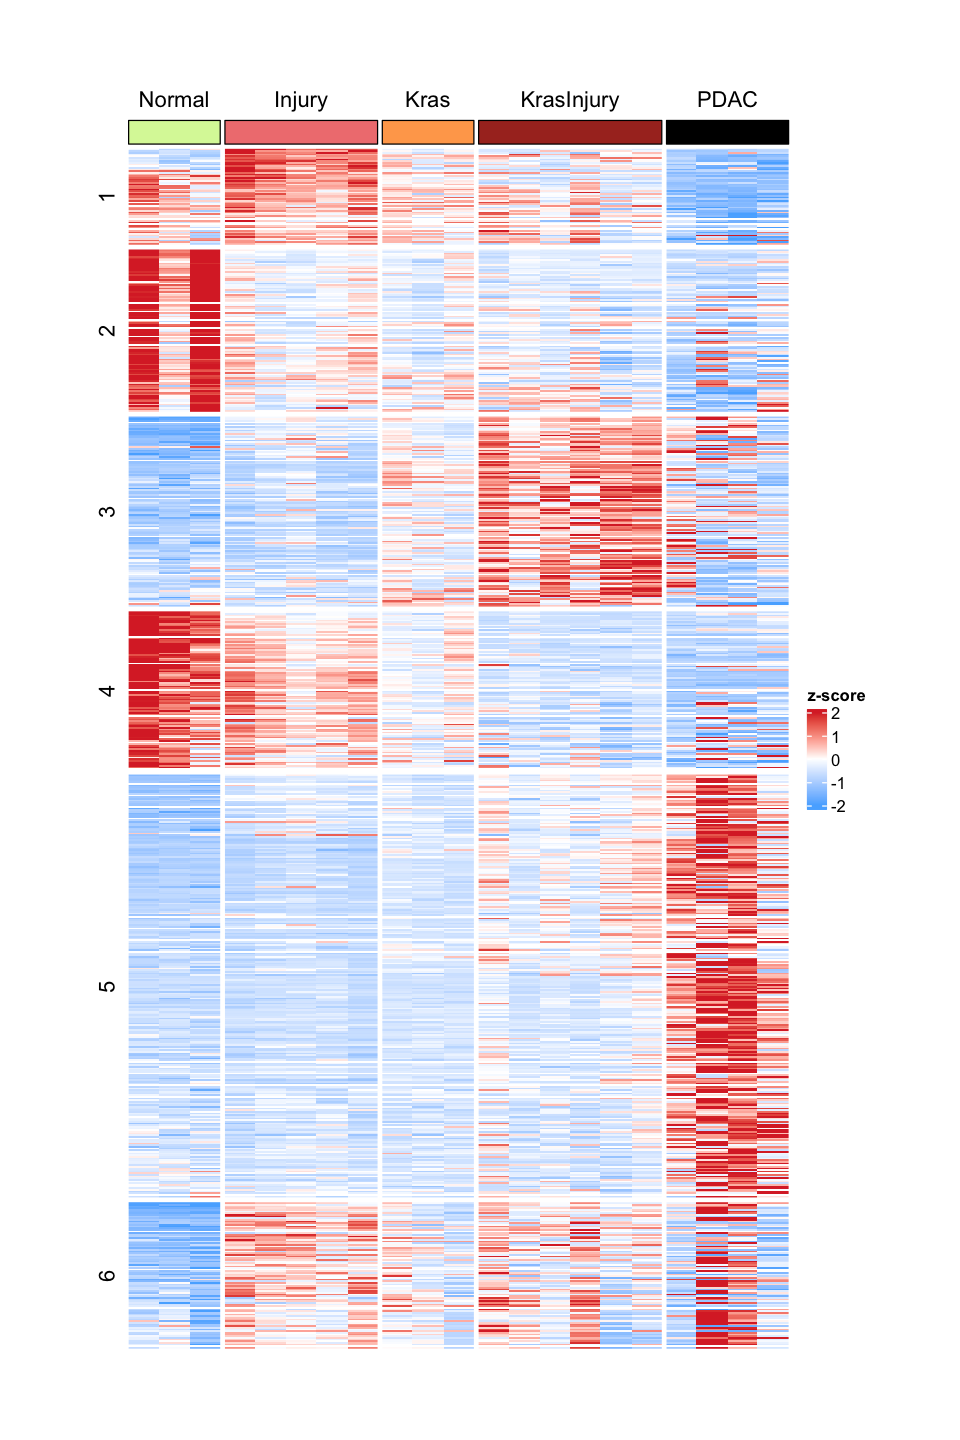

In [28]:
# Change Jupyter plots size
options(repr.plot.width=8, repr.plot.height=12)

column_category = c(rep("1Normal",3), rep("2Injury",5),
                    rep("3Kras",3), rep("4KrasInjury",6),
                    rep("5PDAC",4))

anno_color = c("#DAF7A6", "#F08080", "#FFA759", "#A93226", "#000000")
palette = colorRamp2(c(-2, 0, 2), c("#58B1FF", "white", "#DB2F2F"))

Heatmap(subset(scaled_dPeaks, select=-c(PDAC_ATAC5, PDAC_ATAC6)),
        name="z-score", row_order=rownames(clusterPeaks),
        row_split=group, 
#         row_title=c("Early Neoplasia", "Acinar",
#                     "Shared", "Regenerative"),
        column_order=names(scaled_dPeaks),
        column_split=column_category,
        column_title=c("Normal", "Injury", "Kras", 
                       "KrasInjury", "PDAC"),
        show_row_names = FALSE, show_column_names=FALSE, 
        width=unit(5.5, "in"), height=unit(10, "in"), col=palette,
        top_annotation = HeatmapAnnotation(foo = anno_block(gp = gpar(fill = anno_color))))

### Backup plan: directly used processed data

In [15]:
excel <- read_excel("data/41586_2020_3147_MOESM4_ESM.xlsx",
                    sheet="ATAC-seq-Clusters_Kmeans_peaks")
peak <- data.frame(excel)
# rownames(peak) <- peak$region
# peak <- subset(peak, select=-c(region))
names(peak)[names(peak) == "region"] <- "Peaks"

In [16]:
data2 <- read.csv("data/GSE132440_ATAC_PeakNorm.txt", sep="\t")

# mannual column name replacement base on information of each samples 
# listed on https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE132440

names(data2)[names(data2) == "D1_2_C.Ren.PBS.D2..female."] <- "Normal_ATAC1"
names(data2)[names(data2) == "D13_2_T1.Normal..C.RIK.PBS.d2."] <- "Normal_ATAC2"
names(data2)[names(data2) == "D7_3_T1.Normal..C.RIK.PBS.d2."] <- "Normal_ATAC3" 
names(data2)[names(data2) == "D11_1_T2.Reg.ADM..C.RIK.Caer.d2."] <- "Injury_ATAC1"  
names(data2)[names(data2) == "D14_2_C.Ren.C.d2..ADM.shRen.."] <- "Injury_ATAC2"  
names(data2)[names(data2) == "D6_1_C.Ren.C.d2..ADM.shRen.."] <- "Injury_ATAC3"  
names(data2)[names(data2) == "D8_2_T2.Reg.ADM..C.RIK.Caer.d2."] <- "Injury_ATAC4"  
names(data2)[names(data2) == "D8_3_T2.Reg.ADM..C.RIK.Caer.d2."] <- "Injury_ATAC5"  
names(data2)[names(data2) == "D13_3_T3.KrasG12D..KC.RIK.PBS.d2."] <- "Kras_ATAC1"  
names(data2)[names(data2) == "D6_3_T3.KrasG12D..KC.RIK.PBS.d2."] <- "Kras_ATAC2"  
names(data2)[names(data2) == "D8_1_T3.KrasG12D..KC.RIK.PBS.d2."] <- "Kras_ATAC3" 
names(data2)[names(data2) == "D11_3_KC.552OFF.C.d2...ADR.sh552Off."] <- "KrasInjury_ATAC1"  
names(data2)[names(data2) == "D18_3_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC2"  
names(data2)[names(data2) == "D19_3_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC3"  
names(data2)[names(data2) == "D4_2_KC.REN.C.d2..ADR.shRen.."] <- "KrasInjury_ATAC4"  
names(data2)[names(data2) == "D7_1_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC5"  
names(data2)[names(data2) == "D19_1_T4.Tum.ADR..KC.RIK.Caer.d2."] <- "KrasInjury_ATAC6"  
names(data2)[names(data2) == "D2_1_T7.PDAC..KPflC.GEMMs."] <- "PDAC_ATAC1"  
names(data2)[names(data2) == "D12_1_T7.PDAC..KPcr_organoids."] <- "PDAC_ATAC2"  
names(data2)[names(data2) == "D12_2_T7.PDAC..KPcr_organoids."] <- "PDAC_ATAC3" 
names(data2)[names(data2) == "D22_3_T7.PDAC..KPcr_organoids."] <- "PDAC_ATAC4"

# two PDAC data not found on the website, 
# rename to PDAC_ATAC5 and PDAC_ATAC6 for now
names(data2)[names(data2) == "D3_2_T7.PDAC..KPR127H_shp53_orgs."] <- "PDAC_ATAC5"
names(data2)[names(data2) == "D3_3_T7.PDAC..KPR127H_Ren_orgs."] <- "PDAC_ATAC6"

In [17]:
pdac <- subset(data2, select=c(Peaks, PDAC_ATAC1,PDAC_ATAC2,PDAC_ATAC3,
                              PDAC_ATAC4,PDAC_ATAC5,PDAC_ATAC6))

peak_all <- inner_join(peak, pdac, by ="Peaks")

In [18]:
# modified column name 
names(peak_all)[names(peak_all) == "cluster..kmean."] <- "cluster_kmean"
names(peak_all)[names(peak_all) == "Kras._ATAC1"]<- "Kras_ATAC1"
names(peak_all)[names(peak_all) == "Kras._ATAC2"]<- "Kras_ATAC2"
names(peak_all)[names(peak_all) == "Kras._ATAC3"]<- "Kras_ATAC3"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC1"]<- "KrasInjury_ATAC1"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC2"]<- "KrasInjury_ATAC2"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC3"]<- "KrasInjury_ATAC3"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC4"]<- "KrasInjury_ATAC4"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC5"]<- "KrasInjury_ATAC5"
names(peak_all)[names(peak_all) == "Kras..Injury_ATAC6"]<- "KrasInjury_ATAC6"

kmean <- subset(peak_all, select=c(cluster_kmean))
peakdata <- subset(peak_all, select=-c(Peaks, cluster_kmean,
                                       annotation, distanceToTSS, 
                                       ENSEMBL, SYMBOL, GENENAME))
names(peakdata)

[1] "Normal_ATAC2"     "Normal_ATAC3"     "Normal_ATAC1"     "Injury_ATAC4"    
 [5] "Injury_ATAC5"     "Injury_ATAC1"     "Injury_ATAC2"     "Injury_ATAC3"    
 [9] "Kras_ATAC2"       "Kras_ATAC3"       "Kras_ATAC1"       "KrasInjury_ATAC5"
[13] "KrasInjury_ATAC2" "KrasInjury_ATAC6" "KrasInjury_ATAC3" "KrasInjury_ATAC4"
[17] "KrasInjury_ATAC1" "PDAC_ATAC1"       "PDAC_ATAC2"       "PDAC_ATAC3"      
[21] "PDAC_ATAC4"       "PDAC_ATAC5"       "PDAC_ATAC6"

In [19]:
scaled_peak <- t(scale(t(peakdata)))
scaled_peak <- subset(scaled_peak,
                      select=-c(PDAC_ATAC5, PDAC_ATAC6))

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



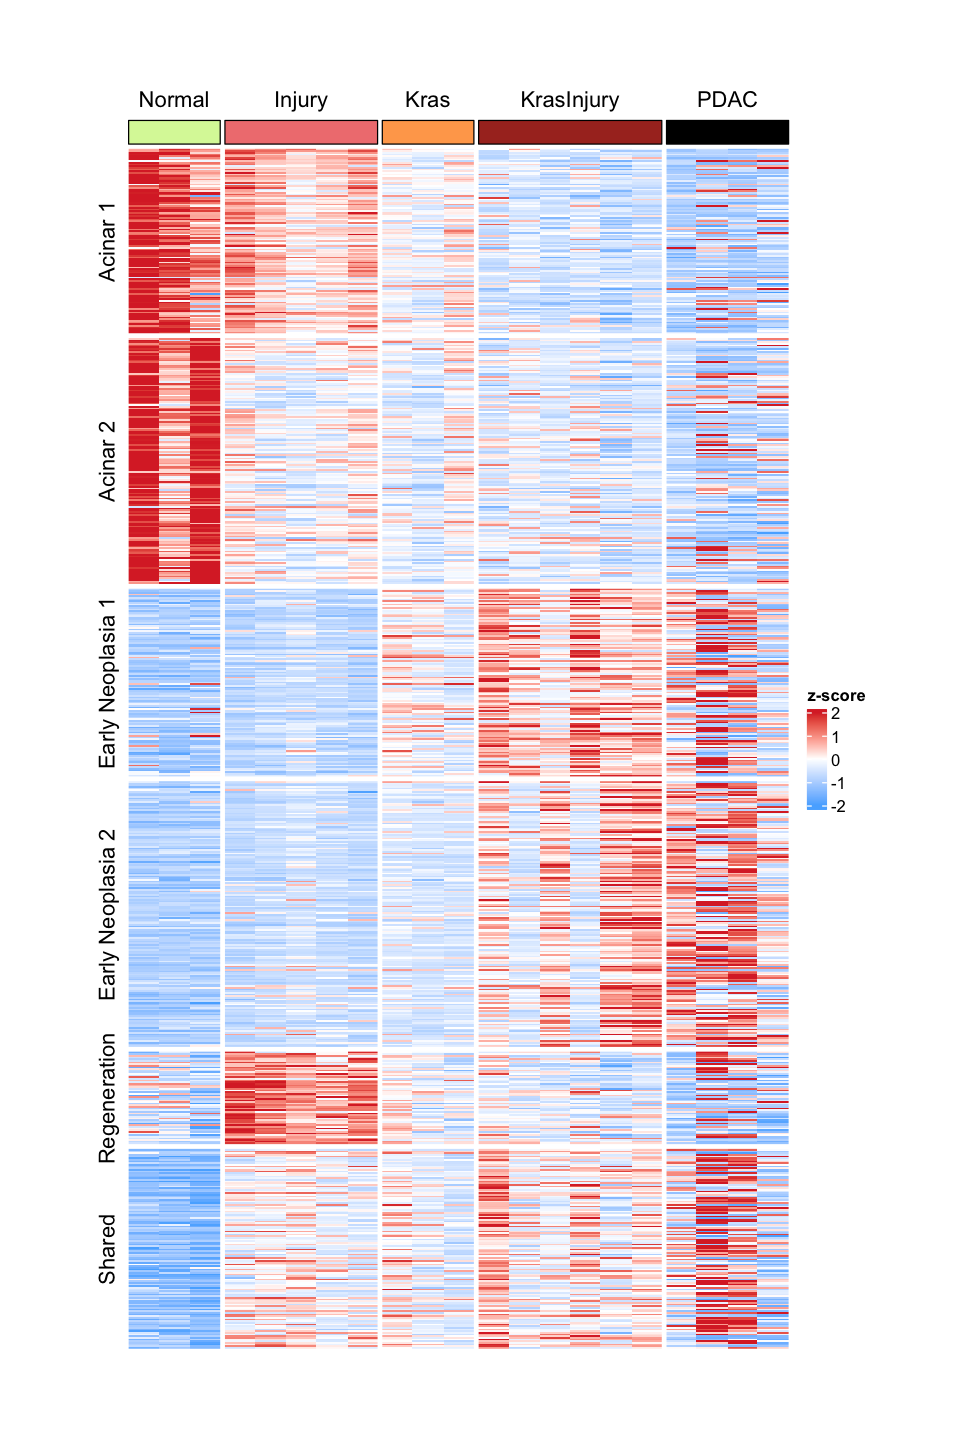

In [20]:
# Change Jupyter plots size
options(repr.plot.width=8, repr.plot.height=12)

column_category = c(rep("1Normal",3), rep("2Injury",5),
                    rep("3Kras",3), rep("4KrasInjury",6),
                    rep("5PDAC",4))

anno_color = c("#DAF7A6", "#F08080", "#FFA759", "#A93226", "#000000")
palette = colorRamp2(c(-2, 0, 2), c("#58B1FF", "white", "#DB2F2F"))

Heatmap(scaled_peak, name="z-score", use_raster=TRUE,
        row_split=kmean, column_split=column_category,
        row_title=c("Acinar 1", "Acinar 2", 
                    "Early Neoplasia 1", "Early Neoplasia 2",
                    "Regeneration", "Shared"),
        column_title=c("Normal", "Injury", "Kras", 
                       "KrasInjury", "PDAC"),
        row_order=rownames(scaled_peak), 
        column_order=names(scaled_peak), 
        show_row_names = FALSE, show_column_names=FALSE, 
        width=unit(5.5, "in"), height=unit(10, "in"), col=palette,
        top_annotation = HeatmapAnnotation(foo = anno_block(gp = gpar(fill = anno_color))))

### A comparison
||processed data|filtered normalized data|actual figure|
|:--|:-:|:-:|:-:|
|total peaks|31185|42292|31185|
|figure|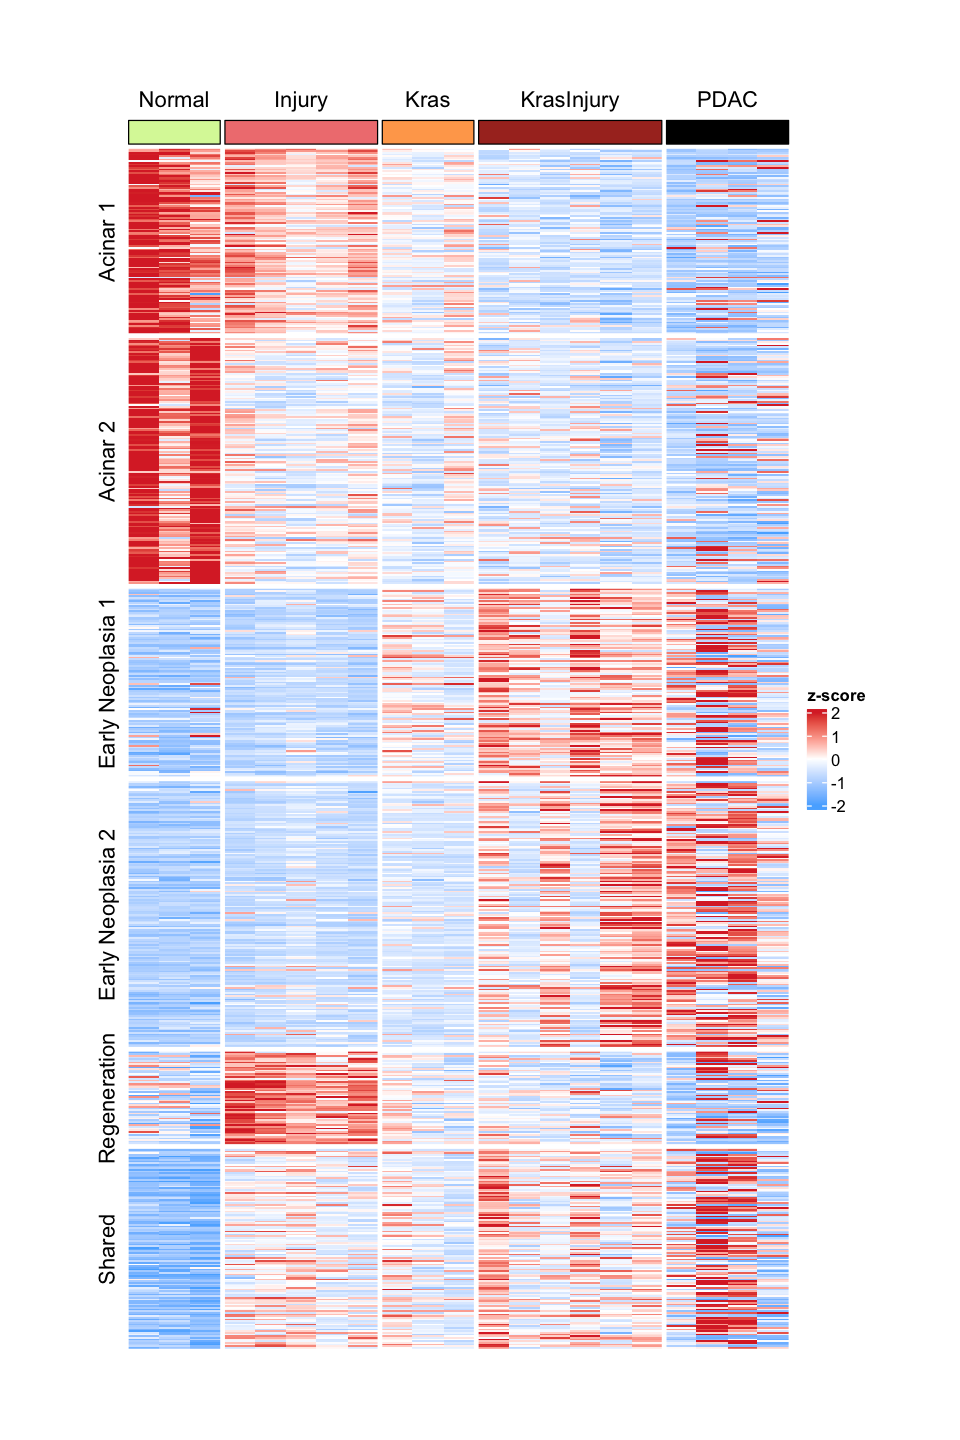|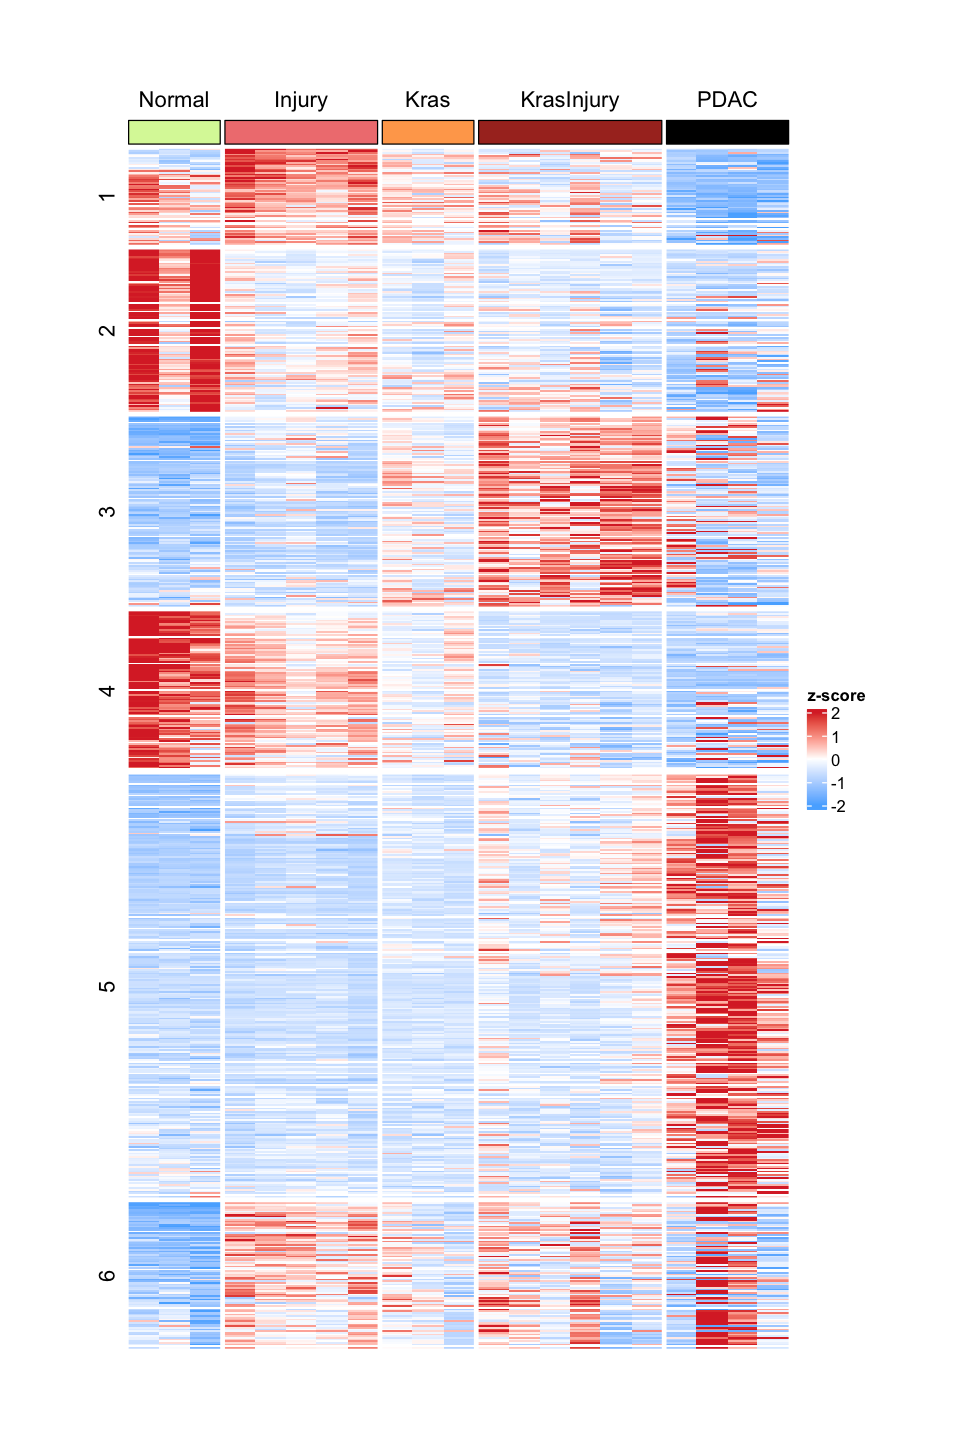|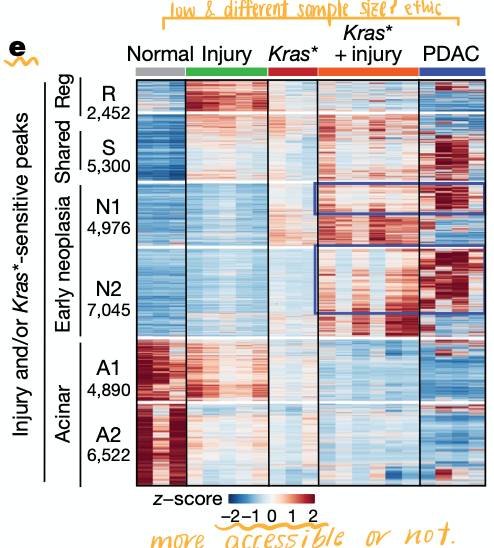|

__Observation__
- Could see similar pattern in six clusters, which:
   >1. cluster 1 is likely the regenerative peaks with injury ATAC gain
   >2. cluster 2 is likely the peaks for Acinar 2 with shared ATAC loss
   >3. cluster 3 is likely the early neoplasia 1 peaks with Kras ATAC gain
   >4. cluster 4 is likely the Acinar 1 peaks with Kras ATAC loss
   >5. cluster 5 is likely the early neoplasia 2 with KrasInjury  gain
   >5. cluster 6 is likely the shared peaks with shared ATAC gain
- However, using the DESeq2 output found in extended data table 4 to filter the merged normalize peak gives 42292 peaks rather than 31185, along with the two PDAC peak data that is found to be not used, suggesting that the authors probably did some more filtering and analysis that is not specifically pointed out in their paper. __(check w/ prof)__